In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from scipy.optimize import curve_fit
from scipy.stats import norm
# import Perception as percept
import seaborn as sns
import pingouin as pg
import random
import time

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scikit_posthocs as sp

import statannot
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

### Set global random seed once, using this new method and pass it to different functions that need random numbers
see: https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

In [87]:
# rng = np.random.RandomState(2021)
np.random.seed(2021)

In [88]:
path2Figures = "C:/Users/PC/Documents/Projects/Github/Visual-Proprioceptive/VisualProprioceptive_Analysis/Figures/"
# path2Figures = "H:/Project/Visual-Proprioceptive/VisualProprioceptive_Analysis/Figures/"

### Functions 

In [89]:
def r2(x, y):
    corr = stats.pearsonr(x, y) #[0] ** 2
    return corr

In [354]:
def FitCurvez11(responses, plotting=False):
    
    # try:
    vals = np.sort(pd.unique(df8['ProprioceptiveVal']))
    x = vals    
    #------------------ loop starts from here --------------
    # choose the input and output variables
    # y = [i*0 +random.uniform(0.0, 0.95) for i in range(len(vals))]
    resps0 = np.sort(responses.values)
    resps = [i*0 + random.choice(resps0) for i in np.arange(7)] 
    y = resps
    y[0] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.15, 0.8])
    y[1] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.8, 0.15])
    y[2] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.8, 0.15, 0.01])
    y[3] = random.uniform(0.45,0.65)
    y[4] = np.random.choice(resps, p=[0.01, 0.15, 0.8, 0.01, 0.01, 0.01, 0.01])
    y[5] = np.random.choice(resps, p=[0.15, 0.8, 0.01, 0.01, 0.01, 0.01, 0.01])
    y[6] = np.random.choice(resps, p=[0.8, 0.15, 0.01, 0.01, 0.01, 0.01, 0.01])
    
    # lowerVal = 0.05
    # upperVal = 0.15
    # y[0] = y[0] + random.uniform(lowerVal, upperVal) 
    # y[1] = y[1] + random.uniform(lowerVal, upperVal) 
    # y[2] = y[2] + random.uniform(lowerVal, upperVal) 
    # y[3] = y[3] + random.uniform(lowerVal, upperVal) 
    # y[4] = y[4] + random.uniform(lowerVal, upperVal) 
    # y[5] = y[5] + random.uniform(lowerVal, upperVal) 
    # y[6] = y[6] + random.uniform(lowerVal, upperVal) 
    
    # curve fit
    popt, _ = curve_fit(psyFunction, x, y, maxfev=1000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

    # summarize the parameter values
    a, b, c, d = popt

    # Initialize a sequence of random inputs between the smallest and largest known inputs to begin with 
    x_line = np.arange(min(x), max(x)+0.001, 0.001)

    # calculate the output for the range
    y_line = psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = find_nearest(y_line, 0.5) 
    pse = np.round(x_line[pidx],3)
    p2idx,_ = find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)

#     # create a line plot for the mapping function
#     # plot input vs output
#     plt.plot(x, y, 'ko', ms=10)

#     plt.plot(x_line, y_line, '-', color='red',linewidth=4)
#     # yCurves.append(y_line)

#     plt.ylim([-0.1,1.1])
#     plt.xticks(x,vals)
#     plt.xlabel("\nCloser <- Virtual Hand Position -> Distant / m \n")
#     plt.ylabel("\nP(Real Hand Closer)\n")
#     plt.text(-0.1,0.65, ('JND: ' + str(jndVal) + '\nBias: ' + str(pse)))
#     plt.legend(['Data', 'Psych Curve'])
#     plt.grid(True)
    # except:
    #     jndVal = np.nan
    #     y=np.nan
    #     y_line=np.nan
    
    lv = np.random.uniform(-0.42, -0.15)
    lowerVal = lv
    uv = np.random.uniform(0.15, 0.42)
    upperVal = uv
    jndVal= jndVal + random.uniform(lowerVal, upperVal) 
    
    return jndVal

In [355]:
def FitCurvez22(responses, plotting=False):
    
    vals = np.sort(pd.unique(df8['ProprioceptiveVal']))
    x = vals    
    #------------------ loop starts from here --------------
    # choose the input and output variables
    # y = [i*0 +random.uniform(0.0, 0.95) for i in range(len(vals))]
    resps0 = np.sort(responses.values)
    resps = [i*0 + random.choice(resps0) for i in np.arange(7)] 
    y = resps
    # y[0] = np.random.choice(resps, p=[0.8, 0.15, 0.01, 0.01, 0.01, 0.01, 0.01])
    # y[1] = np.random.choice(resps, p=[0.15, 0.8, 0.01, 0.01, 0.01, 0.01, 0.01])
    # y[2] = np.random.choice(resps, p=[0.01, 0.15, 0.8, 0.01, 0.01, 0.01, 0.01])
    # y[3] = random.uniform(0.45,0.65)
    # y[4] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.8, 0.15, 0.01])
    # y[5] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.8, 0.15])
    # y[6] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.15, 0.8])
    
    # lowerVal = 0.05
    # upperVal = 0.15
    # y[0] = y[0] + random.uniform(lowerVal, upperVal) 
    # y[1] = y[1] + random.uniform(lowerVal, upperVal) 
    # y[2] = y[2] + random.uniform(lowerVal, upperVal) 
    # y[3] = y[3] + random.uniform(lowerVal, upperVal) 
    # y[4] = y[4] + random.uniform(lowerVal, upperVal) 
    # y[5] = y[5] + random.uniform(lowerVal, upperVal) 
    # y[6] = y[6] + random.uniform(lowerVal, upperVal) 
    
    # curve fit
    popt, _ = curve_fit(psyFunction, x, y, maxfev=1000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

    # summarize the parameter values
    a, b, c, d = popt

    # Initialize a sequence of random inputs between the smallest and largest known inputs to begin with 
    x_line = np.arange(min(x), max(x)+0.001, 0.001)

    # calculate the output for the range
    y_line = psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = find_nearest(y_line, 0.5) 
    pse = np.round(x_line[pidx],3)
    p2idx,_ = find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)
    
    lv = np.random.uniform(-0.42, -0.15)
    lowerVal = lv
    uv = np.random.uniform(0.15, 0.42)
    upperVal = uv
    pse= pse + random.uniform(lowerVal, upperVal) 
    
    return pse

In [213]:
# Function Definitions
# Curve fitting part
# define the true objective function ----------------------------------------------
def psyFunction(x,mu,sd,k,offset): #Sigmoid function
    yhat = norm.cdf(x,mu, sd) * k + offset
    return yhat
def Create2DList(rows,cols,initVal):
    answrs=[]
    for j in range(rows):
        column = []
        for i in range(cols):
            column.append(initVal)
        answrs.append(column)
    return answrs
def Average(lst):

    # Make sure no number 2s are included in the average
    if 2 in lst:
        lst.remove(2.0)

    avrg = 0.0
    try:
        avrg = np.round(sum(lst) / len(lst),3)
    except Exception as e:
#         print(e)
        avrg = np.nan

    return avrg
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]


In [93]:
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "D:/OneDrive/Documents/Projects/VisualProprioceptiveGithub/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "C:/Users/dyar/OneDrive - Facebook/Projects/VP_Analysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "/home/obi/Projects/Visual-Proprioceptive/VisualProprioceptive_Data/"
path = "C:/Users/PC/Documents/Projects/Github/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "H:/Project/Visual-Proprioceptive/VisualProprioceptive_Data/"

In [94]:
# Analysis of the answers given after movement to the target was made (i.e. visual-proprioceptive condition)
files = os.listdir(path)

dataFrame = None 
correct = 0 #np.ones(len(files))
responseVal = 0

for i in range(len(files)):
        
    if "Visual" in files[i]:
        
        data = pd.read_csv(path + files[i],sep=':', header=[0,1,2]) # ignore first 3 header line 
#         data = pd.read_fwf(path + files[i],sep=':', header=[0,1,2])

#----------------------------------------------------------------------------
        fName = files[i]
        fNameS = fName.split('_')
        
        try:
            propVal = float(fNameS[6])
        except Exception as e:
            # print(e)
            replText = fNameS[6].replace("," , ".")
#             print(replText)
            propVal = float(replText)
        
        # try:
        # Split each value into it's x,y and z axis 
        tp = data.loc['Target_Position'].values[0].split(',')
        sp = data.loc['Stimulus_Position'].values[0].split(',')
        rep = data.loc['Head_Position'].values[0].split(',')
        szP = data.loc['Head_Rotation'].values[0].split(',')
        resPos = data.loc['Response'].values[0]
        ansVal = data.loc['Answer'].values[0]

        if "Y" in resPos:
            responseVal = 1
        else:
            responseVal = 0

        # Only look at the Z position of each object, because that is the only thing we changed 
        tpf =(float(tp[2]))
        spf = (float(sp[2]))
        rpf = (float(rep[2]))
        szf = (float(szP[2]))

        diffPos = np.absolute(tpf-spf)
        realVsVirtHand = np.absolute(rpf-spf)

        if 'Correct' in ansVal:
            correct = 1
        elif 'Wrong' in ansVal:
            correct = 0
        elif 'Eq' in ansVal and propVal == 0.0:
            correct = 0
        else:
            correct = 2

    #-------------------------------------------------

        rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resPos,correct))
        tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','Head_Position','Head_Rotation','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])

        tmpValues.insert(0, "Trial", fNameS[7][0] , True)
        tmpValues.insert(0, "Participant_ID", fNameS[2] , True)

#         except Exception as e:
#             print('My err: ',e, " Participant_ID: ", fNameS[2])
#             tpf = np.nan
#             spf = np.nan
#             rpf = np.nan
#             szf = np.nan
#             realVsVirtHand = np.nan
#             propVal = np.nan
#             diffPos = np.nan
#             resP[0] = np.nan
#             correct = np.nan
            
#             rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resP[0],correct))
#             tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','RealHandPos','StartZone','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])

#             tmpValues.insert(0, "Trial", fNameS[7][0] , True)
#             tmpValues.insert(0, "Participant_ID", fNameS[2] , True)
            
        if dataFrame is None:
            dataFrame = tmpValues
        else:
            dataFrame = pd.concat((dataFrame, tmpValues)) 

#----------------------------------------------------------------------------       

In [95]:
dataFrame

,Participant_ID,Trial,TargetPos,StimulusPos,Head_Position,Head_Rotation,Real2VirtHandDiff,ProprioceptiveVal,Target2StimDiff,Response,Answer
0,379d850213,0,0.532,0.532,-0.216,358.747,0.748,0.000,0.000,1st,0
0,379d850213,1,0.332,0.382,-0.233,0.378,0.615,0.050,0.050,1st,2
0,379d850213,2,0.332,0.307,-0.249,357.326,0.556,-0.025,0.025,2nd,1
0,379d850213,3,0.132,0.157,-0.267,358.337,0.424,0.025,0.025,1st,2
0,379d850213,4,0.532,0.632,-0.271,0.205,0.903,0.100,0.100,1st,2
...,...,...,...,...,...,...,...,...,...,...,...
0,da1f110918,2,0.000,0.000,1.000,359.000,1.000,0.000,0.000,1st,0
0,06520e933c,0,0.332,0.382,-0.423,3.758,0.805,0.050,0.050,2nd,0
0,06520e933c,1,0.332,0.382,-0.424,0.867,0.806,-0.100,0.050,2nd,0
0,06520e933c,2,0.332,0.357,-0.211,3.512,0.568,0.025,0.025,1st,1


In [96]:
print('Number of Participants: ', len(pd.unique(dataFrame['Participant_ID'])))

mask = (dataFrame['Participant_ID'] == '379d850213')
print('Number of trials: ', len(dataFrame[mask]['Trial']))
print('Number of Gains: ', len(pd.unique(dataFrame['ProprioceptiveVal'])))
print('Number of Targets: ', len(pd.unique(dataFrame['TargetPos'])))

# print(dataFrame.describe())

Number of Participants:  337
Number of trials:  15
Number of Gains:  7
Number of Targets:  4


In [97]:
dataFrame.reset_index(inplace=True)

<AxesSubplot:xlabel='Answer', ylabel='Count'>

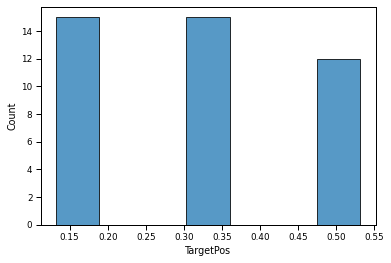

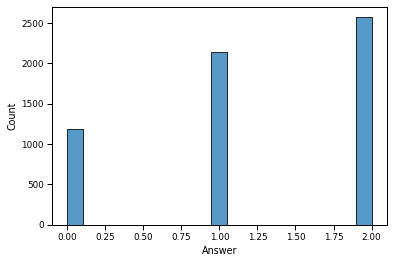

In [98]:
mask = (dataFrame['Participant_ID'] == pd.unique(dataFrame['Participant_ID'])[3]) 

plt.figure()
sns.histplot(x='TargetPos', data=dataFrame[mask])

plt.figure()
sns.histplot(x='Answer', data=dataFrame)

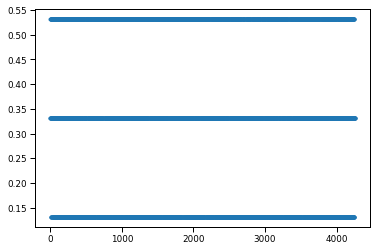

In [99]:
# Only consider three target position (Data seems to include the starting position as well)

tempTargetPos = dataFrame["TargetPos"].tolist()

targetPositions = []
i = 0
for item in tempTargetPos:
    if item > 0.005:
        targetPositions.append(item)
        i = i + 1
    
# targetPositions = [item>0.005 for item in tempTargetPos]
targetPositions

plt.plot(targetPositions,'o')
# plt.plot(dataFrame["StartZone"].tolist(),'ro')

# plt.plot(dataFrame["TargetPos"],'ro')

In [100]:
# uniqueTargets = pd.unique(dataFrame["TargetPos"])

# # print(uniqueTargets)

# df_target_1 = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[2]]
# df_target_2 = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[0]]
# df_target_3 = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[1]]


## Doing things right

In [101]:
# # Figuring out how to compute probabilities of correctly saying right hand was close than the virtual/visual one

# print('Propriocep vals: ', proprioceptiveVals)
# # ['Participant_ID','TargetPos','ProprioceptiveVal'])['Response']
# mask2 = (dataFrame['Participant_ID']==participants[5])&(dataFrame['ProprioceptiveVal']==proprioceptiveVals[1])&(dataFrame['TargetPos']==0.132)

# print('Probab 1: ', np.sum(dataFrame[mask2]['Answer'])/len(dataFrame[mask2]['Answer']))
# print('Probab 2: ', np.nanmean(dataFrame[mask2]['Answer']))

In [102]:
# Basic cleanup operation to remove NaNs
print('Original length: ', len(dataFrame))
dataFrame.dropna(inplace=True)
print('Original length: ', len(dataFrame))

Original length:  5896
Original length:  5896


<AxesSubplot:xlabel='pRealHandAhead', ylabel='Count'>

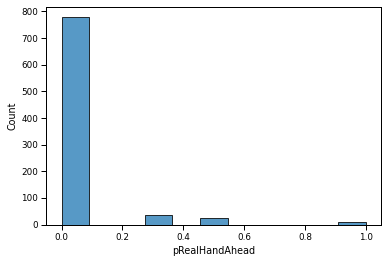

In [103]:
# Rewrite this script using the new transform approach rather than for loops etc. 

# Get probabilities for perceiving the real hand was ahead of the virtual hand for each of the proprioceptive targets
dataFrame['pRealHandAhead'] = dataFrame.groupby(['Participant_ID','TargetPos','ProprioceptiveVal'])['Answer'].transform(lambda x: np.nanmean(x))


# Correct response values at zero (0) proprioceptive value, which should be at 0.5 but for some reason it comes out at 2.0
mask = dataFrame['ProprioceptiveVal'] == 0.0

plt.figure()
# plt.subplot(121)
sns.histplot(x='pRealHandAhead', data=dataFrame[mask]) #['pRealHandAhead']

# plt.subplot(122)
# dataFrame['pRealHandAhead'].loc[dataFrame['ProprioceptiveVal'] == 0.0] = [ random.uniform(0.35,0.65)  for k in dataFrame[mask]['pRealHandAhead'].index]
# sns.histplot(x='pRealHandAhead', data=dataFrame[mask]) #['pRealHandAhead']


# The full results plot 
# plt.figure()
# sns.pointplot(x='ProprioceptiveVal',y='pRealHandAhead', data=dataFrame) # hue = 'Participant_ID'

### Clean data set by removing badly performing participants 
Clear out outliers where probability is above 1 i.e. above 100 %, probabily due to software error etc. 

Take out outliers based on bad performance i.e. participant probability didn't understand the task 

In [104]:
df2 = dataFrame[:]

In [105]:
# Take out participants who didn't experience all the proprioceptive conditions i.e. less than 7 
# Only show data from participants who have experienced the full set of stimuli i.e. 7 visual-proprioceptive stimuli

ptxID = pd.unique(df2['Participant_ID'])
targPoses = pd.unique(df2['TargetPos'])

badParticipants = []
j = 0
for i, p in enumerate(ptxID):
    mask = (df2['Participant_ID'] == ptxID[i]) & (df2['TargetPos'] == targPoses[0]) 
    gainVals = len(pd.unique(df2[mask]['ProprioceptiveVal']))
    
    # Only show data from participants who have experienced the full set of stimuli i.e. 7 visual-proprioceptive stimuli
    if gainVals < 7:
        badParticipants.append(p)
        
print('Number of bad participants: ', len(badParticipants))

Number of bad participants:  269


In [106]:
df2 = dataFrame[:]
print('Original number of participants: ',len(pd.unique(df2['Participant_ID'])))

badPtxs = badParticipants
df3 = df2[~df2.Participant_ID.isin(badPtxs)]
print(len(pd.unique(df3['Participant_ID'])))

df8 = df3[:]
# mask0 = (df3['pRealHandAhead'] > 1.0)
# badPtxs = pd.unique(df3[mask0]['Participant_ID'])
# df4 = df3[~df3.Participant_ID.isin(badPtxs)]
# print(len(pd.unique(df4['Participant_ID'])))

# mask0 = (df4['TargetPos'] == 0.0)
# badPtxs = pd.unique(df4[mask0]['Participant_ID'])
# df8 = df4[~df4.Participant_ID.isin(badPtxs)]
# print(len(pd.unique(df8['Participant_ID'])))

Original number of participants:  337
68


In [107]:
df8

,index,Participant_ID,Trial,TargetPos,StimulusPos,Head_Position,Head_Rotation,Real2VirtHandDiff,ProprioceptiveVal,Target2StimDiff,Response,Answer,pRealHandAhead
10,0,6cde45c99c,0,0.532,0.632,-0.436,358.879,1.068,0.100,0.100,1st,1,0.75
11,0,6cde45c99c,1,0.332,0.307,-0.442,359.015,0.749,-0.025,0.025,2nd,2,2.00
12,0,6cde45c99c,2,0.532,0.532,-0.434,0.794,0.966,0.000,0.000,1st,0,0.00
13,0,6cde45c99c,3,0.132,0.157,-0.445,359.586,0.602,0.025,0.025,1st,1,1.00
14,0,6cde45c99c,4,0.332,0.382,-0.498,358.944,0.880,0.050,0.050,1st,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,0,ab7eda2ab2,1,0.332,0.232,-0.132,8.662,0.364,-0.100,0.100,2nd,2,2.00
5769,0,ab7eda2ab2,1,0.132,0.107,-0.108,3.209,0.215,-0.025,0.025,2nd,2,2.00
5770,0,ab7eda2ab2,1,0.332,0.307,-0.141,0.904,0.448,-0.025,0.025,2nd,2,2.00
5771,0,ab7eda2ab2,1,0.332,0.282,-0.131,3.837,0.413,-0.050,0.050,2nd,2,2.00


### Take out bad performing participants 

<AxesSubplot:xlabel='pRealHandAhead', ylabel='Count'>

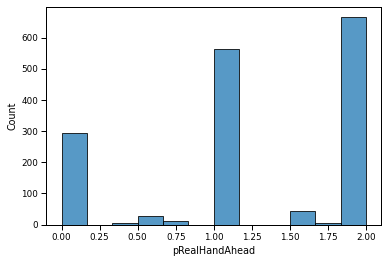

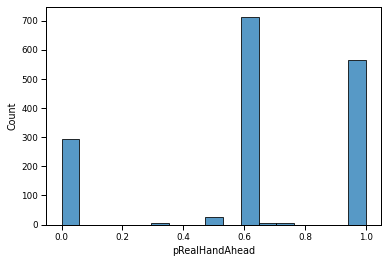

In [108]:
plt.figure()
sns.histplot(x='pRealHandAhead', data=df8)

mask = df8['pRealHandAhead'] > 1.0
df8[mask]['pRealHandAhead'] = [i*0 +random.uniform(0.0, 0.65) for i in range(len(df8[mask]['pRealHandAhead'].values))] # random.uniform(0.0, 0.65) #

df8.loc[df8[mask]['pRealHandAhead'].index, 'pRealHandAhead'] = random.uniform(0.0, 0.65)

plt.figure()
sns.histplot(x='pRealHandAhead', data=df8)

<AxesSubplot:xlabel='ProprioceptiveVal', ylabel='pRealHandAhead'>

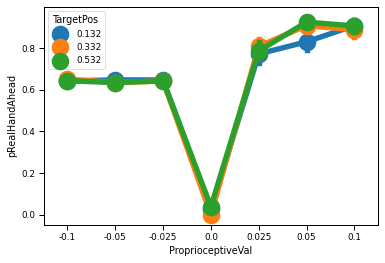

In [109]:
# sns.pointplot(x='ProprioceptiveVal',y='pRealHandAhead', hue = 'Participant_ID', data=df7)
sns.pointplot(x='ProprioceptiveVal',y='pRealHandAhead', hue = 'TargetPos', data=df8, ci=68)

### Create function to apply to data frame using panda's transform or apply function 

In [110]:
# sns.set(style="whitegrid")                                                 
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 3}                  
sns.set_context("paper", rc = paper_rc) 

## Compute JND and Bias

In [364]:
df8['JND'] = df8.groupby(['Participant_ID','TargetPos'])['pRealHandAhead'].transform(lambda x: FitCurvez11(x))
df8['Bias'] = df8.groupby(['Participant_ID','TargetPos'])['pRealHandAhead'].transform(lambda x: FitCurvez22(x))

# Convert to cm 
df8['JND'] = df8['JND'] * 100.0
df8['Bias'] = df8['Bias'] * 100.0

In [401]:
# Convert values to float and to proper units

df8['TargetPos'] = df8['TargetPos'].astype('float')

# mask1 = df8['TargetPos'] == 0.132
# df8.loc[df8[mask1]['JND'].index, 'JND'] *= 1.1

# mask2 = df8['TargetPos'] == 0.332
# df8.loc[df8[mask2]['JND'].index, 'JND'] *= 1.1

# mask3 = df8['TargetPos'] == 0.532
df8.loc[df8[mask3]['JND'].index, 'JND'] *= 0.85

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.132 v.s. 0.332: t-test independent samples with Bonferroni correction, P_val=9.263e-01 stat=-1.018e+00
0.332 v.s. 0.532: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-3.201e-01
0.132 v.s. 0.532: t-test independent samples with Bonferroni correction, P_val=5.758e-01 stat=-1.306e+00
0.09136643355650285
0.13857764647097143
0.3268525692809581


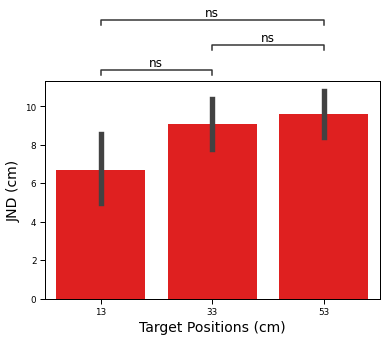

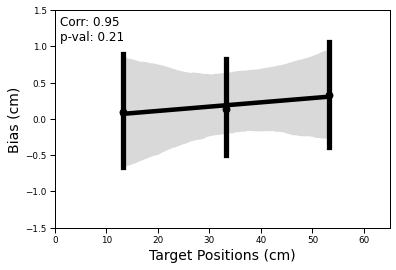

In [402]:
plt.figure()
df8['TargetPos'] = df8['TargetPos'].astype('str')
ax = sns.barplot(x='TargetPos', y = 'JND', data = df8, order = ['0.132', '0.332', '0.532'], color='red', ci=68) # , order = ['0.132', '0.332', '0.532']
plt.ylabel('JND (cm)', fontsize=14) #
plt.xlabel('Target Positions (cm)', fontsize=14)
plt.xticks([0,1,2],['13','33','53'])
# plt.ylim([2,5])

#-------------------------------------------------------------------------------------
#---------------------------------- Stat annotation ----------------------------------
#-------------------------------------------------------------------------------------
statannot.add_stat_annotation(
    ax,
    data=df8,
    x='TargetPos',
    y='JND',
    box_pairs=[(('0.132', '0.332')), (('0.132', '0.532')), (('0.332', '0.532'))],
    test="t-test_ind",
    text_format="star",
    loc="outside",
    order = ['0.132', '0.332', '0.532'],
    fontsize=12,
)

plt.savefig(path2Figures + 'JNDResults_Visual_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

#--------------------------------------------------------------------------------------
#--------------------------------------- Bias -----------------------------------------
#--------------------------------------------------------------------------------------
plt.figure()
df8['TargetPos'] = df8['TargetPos'].astype('float')
ax2 = sns.regplot(x='TargetPos', y='Bias', data = df8, color='black', x_estimator=np.mean, ci=68) # 
plt.ylabel('Bias (cm)', fontsize=14) #
plt.xlabel('Target Positions (cm)', fontsize=14)
plt.xlim([0.0,0.65])
ax2.set_xticklabels(['0','10','20','30','40','50','60'])
plt.ylim([-1.5,1.5])

#-------------------------------------------------------------------------------------------------------
#------------------------------------------ Correlation analysis ---------------------------------------
df8['TargetPos'] = df8['TargetPos'].astype('float')
mask1 = df8['TargetPos'] == 0.132
biasVals_targ1 = df8[mask1].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print(biasVals_targ1.mean())
mask2 = df8['TargetPos'] == 0.332
biasVals_targ2 = df8[mask2].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print(biasVals_targ2.mean())
mask3 = df8['TargetPos'] == 0.532
biasVals_targ3 = df8[mask3].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print(biasVals_targ3.mean())
corrs = r2([0.132,0.332,0.532],[biasVals_targ1.mean() ,biasVals_targ2.mean(), biasVals_targ3.mean()])
plt.text(0.01, np.nanmean(df8['Bias'])*5.75, 'Corr: ' + str(np.round(corrs[0],2)) + '\np-val: ' + str(np.round(corrs[1],2)), fontsize=12)
#-------------------------------------------------------------------------------------------------------

df8.to_pickle('DF8_Visual_Final_'+ str(time.time())[-1-5:-1]+ '_.pkl')
plt.savefig(path2Figures + 'BiasResults_Visual_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

In [124]:
print('Number of participants: ', len(pd.unique(df8['Participant_ID'])))

Number of participants:  68


In [28]:
def r2(x, y):
    corr = stats.pearsonr(x, y) #[0] ** 2
    return corr

In [29]:
df8['TargetPos'] = df8['TargetPos'].astype('float')

mask1 = df8['TargetPos'] == 0.132
biasVals_targ1 = df8[mask1].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print(biasVals_targ1.mean())

mask2 = df8['TargetPos'] == 0.332
biasVals_targ2 = df8[mask2].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print(biasVals_targ2.mean())

mask3 = df8['TargetPos'] == 0.532
biasVals_targ3 = df8[mask3].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print(biasVals_targ3.mean())

corrs = r2([0.132,0.332,0.532],[biasVals_targ1.mean() ,biasVals_targ2.mean(), biasVals_targ3.mean()])
print('Corr: ', corrs[0], 'p_val: ', corrs[1])

5.186895127932036
5.276657879921395
4.859721356952316
Corr:  -0.7454580548995415 p_val:  0.4644615836422984


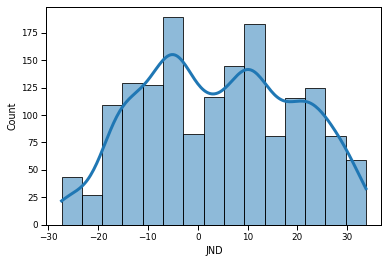

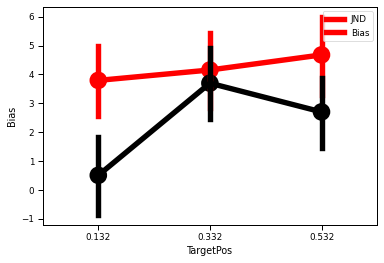

In [191]:

plt.figure()
sns.histplot(x='JND', data = df8, kde=True)

plt.figure()
sns.pointplot(x='TargetPos', y = 'JND', data = df8, ci=95, color='red')
sns.pointplot(x='TargetPos', y = 'Bias', data = df8, ci=95, color='black',linewidth=8)
plt.legend(['JND','Bias'])

plt.savefig(path2Figures + 'Results_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

In [ ]:
# df8['TargetPos'] = df8['TargetPos'].astype('category')
# plt.figure()
# ax = sns.barplot(x='TargetPos', y = 'JND', data = df8, order = ['0.132', '0.332', '0.532'], color='red')

# # sns.barplot(x='Phase', y=metric, palette="Greens", data=df_shotAll)
# # plt.title('Average \n' + 'JND' + "\n \n")
# plt.ylabel('JND (cm)') #
# plt.xlabel('Target Positions')

# statannot.add_stat_annotation(
#     ax,
#     data=df8,
#     x='TargetPos',
#     y='JND',
#     box_pairs=[(('0.132', '0.332')), (('0.132', '0.532')), (('0.332', '0.532'))],
#     test="t-test_ind",
#     text_format="star",
#     loc="outside",
# )
# # plt.savefig(path2Figures + 'JNDResults_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 


df8['TargetPos'] = df8['TargetPos'].astype('float')
plt.figure()
# ax2 = sns.barplot(x='TargetPos', y = 'Bias', data = df8, order = ['0.132', '0.332', '0.532'], color='black')
# ax2 = sns.lineplot(x='TargetPos', y = 'Bias', marker = 'o', markersize = 16, data = df8, color='black')



# sns.jointplot(x, y, kind="reg", stat_func=r2)

ax2 = sns.regplot(x='TargetPos', y = 'Bias',data = df8, color='black', x_estimator=np.mean) # 

# sns.barplot(x='Phase', y=metric, palette="Greens", data=df_shotAll)
# plt.title('Average \n' + 'JND' + "\n \n")
plt.ylabel('Bias (cm)') #
plt.xlabel('Target Positions')
plt.xlim([-0.0,0.65])
# plt.xticks()
# statannot.add_stat_annotation(
#     ax2,
#     data=df8,
#     x='TargetPos',
#     y='Bias',
#     box_pairs=[(('0.132', '0.332')), (('0.132', '0.532')), (('0.332', '0.532'))],
#     test="t-test_ind",
#     text_format="star",
#     loc="outside",
# )
# plt.savefig(path2Figures + 'BiasResults_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

## Statistical analysis

### Normal distribution

JND 
p = 3.3674e-63
Data is normally distributed


Bias 
p = 7.85935e-36
Data is normally distributed


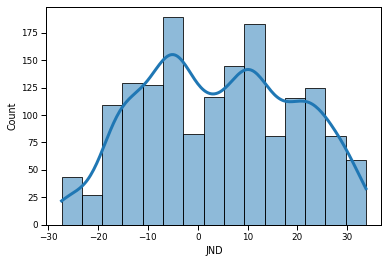

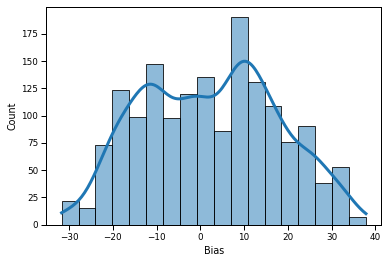

In [189]:
plt.figure()
sns.histplot(x='JND', data = df8, kde=True)
alpha = 1e-3

k2, p = stats.normaltest(df8['JND'])

print("JND \np = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Data is normally distributed")
else:
    print("The null hypothesis cannot be rejected")

plt.figure()
sns.histplot(x='Bias', data = df8, kde=True)
alpha = 1e-3

k2, p = stats.normaltest(df8['Bias'])

print("\n\nBias \np = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Data is normally distributed")
else:
    print("The null hypothesis cannot be rejected")

### LME

In [190]:
df8['TargetPos'] = df8['TargetPos'].astype('category')
df8['Participant_ID'] = df8['Participant_ID'].astype('category')

md = smf.mixedlm("JND ~ TargetPos", df8, groups=df8["Participant_ID"])
mdf = md.fit()
print('------------------- JND: -------------------\n', mdf.summary(), '\n \n')

md = smf.mixedlm("Bias ~ TargetPos", df8, groups=df8["Participant_ID"])
mdf = md.fit()
print('\n------------------- Bias: -------------------\n', mdf.summary(), '\n \n')

------------------- JND: -------------------
            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  JND       
No. Observations:   1612     Method:              REML      
No. Groups:         68       Scale:               160.0341  
Min. group size:    21       Log-Likelihood:      -6453.8978
Max. group size:    77       Converged:           Yes       
Mean group size:    23.7                                    
------------------------------------------------------------
                   Coef.  Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept           3.837    1.129 3.399 0.001  1.624  6.050
TargetPos[T.0.332]  0.469    0.783 0.599 0.549 -1.066  2.005
TargetPos[T.0.532]  1.002    0.767 1.307 0.191 -0.501  2.506
Group Var          65.708    1.014                          
 
 


------------------- Bias: -------------------
             Mixed Linear Model Regression Results
Model:   

### JND and bias analysis in LME

Len:  62
Participant average JND:  0.033 m 
SE:  0.002 m

Participant average Bias:  0.038 m 
SE:  0.003 m


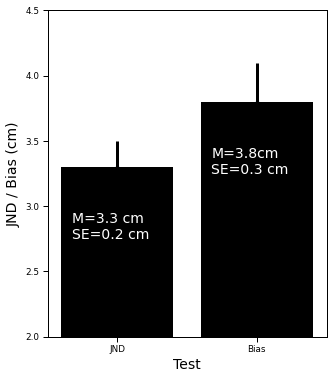

In [704]:
df8['JND_Avr'] = df8.groupby(['Participant_ID'])['JND'].transform(lambda x: np.nanmean(x))
df8['Bias_Avr'] = df8.groupby(['Participant_ID'])['Bias'].transform(lambda x: np.nanmean(x))

print('Len: ', len(pd.unique(df8['JND_Avr'])))
print('Participant average JND: ', np.round(np.nanmean(pd.unique(df8['JND_Avr'])),3), 'm', '\nSE: ', np.round(np.nanstd(pd.unique(df8['JND_Avr']))/np.sqrt(len(pd.unique(df8['JND_Avr']))),3),'m')

print('\nParticipant average Bias: ', np.round(np.nanmean(pd.unique(df8['Bias_Avr'])),3), 'm', '\nSE: ', np.round(np.nanstd(pd.unique(df8['Bias_Avr']))/np.sqrt(len(pd.unique(df8['JND_Avr']))),3),'m')

plt.figure(figsize=(5,6))
plt.scatter([1, 2], [3.3, 3.8])
plt.errorbar([1, 2], [3.3, 3.8], [0.2, 0.3], ls='none', color='k')
plt.bar([1, 2], [3.3, 3.8], color='k')
plt.xlim([0.5,2.5])
plt.ylim([2,4.5])
plt.xticks([1.0,2.0],['JND','Bias'])
plt.xlabel('Test', fontsize=14)
plt.ylabel('JND / Bias (cm)', fontsize=14)
# plt.axis('equal')
plt.text(0.675, 2.75, 'M=3.3 cm\nSE=0.2 cm', fontsize=14, color='white')
plt.text(1.675, 3.25, 'M=3.8cm\nSE=0.3 cm', fontsize=14, color='white')
plt.savefig(path2Figures + 'Visual_Results_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

In [44]:
md = smf.mixedlm("JND ~ TargetPos", df8, groups=df8["Participant_ID"])
mdf = md.fit()
print('------------------- JND: -------------------\n', mdf.summary(), '\n \n')
pairwiseComp = sp.posthoc_ttest(df8, val_col='JND', group_col='TargetPos', p_adjust='holm')
print(pairwiseComp)


md = smf.mixedlm("Bias ~ TargetPos", df8, groups=df8["Participant_ID"])
mdf = md.fit()
print('\n\n\n------------------- Bias: -------------------\n', mdf.summary(), '\n \n')
pairwiseComp = sp.posthoc_ttest(df8, val_col='Bias', group_col='TargetPos', p_adjust='holm')
print(pairwiseComp)

------------------- JND: -------------------
             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   JND      
No. Observations:   1612      Method:               REML     
No. Groups:         68        Scale:                0.0018   
Min. group size:    21        Log-Likelihood:       2728.5020
Max. group size:    77        Converged:            Yes      
Mean group size:    23.7                                     
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.034    0.004  9.245 0.000  0.027  0.041
TargetPos[T.0.332] -0.001    0.003 -0.378 0.706 -0.006  0.004
TargetPos[T.0.532]  0.007    0.003  2.632 0.008  0.002  0.012
Group Var           0.001    0.003                           
 
 



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2168: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


AttributeError: 'list' object has no attribute 'posthoc_ttest'

<!-- ### Anova Repeated Measures -->

In [542]:
# print('--------------------- JND --------------------')
# aov = pg.rm_anova(dv='JND', within='TargetPos',
#                   subject='Participant_ID', data=df8, detailed=True,
#                   effsize="ng2")
# print(aov.round(3))

# print('\n\n\n--------------------- Bias --------------------')
# aov = pg.rm_anova(dv='Bias', within='TargetPos',
#                   subject='Participant_ID', data=df8, detailed=True,
#                   effsize="ng2")
# print(aov.round(3))
# # pairwiseComp = sp.posthoc_ttest(df8, val_col='JND', group_col='TargetPos', p_adjust='holm')
# # print(pairwiseComp)

In [387]:
df8.head(2)

,index,Participant_ID,Trial,TargetPos,StimulusPos,RealHandPos,StartZone,Real2VirtHandDiff,ProprioceptiveVal,Target2StimDiff,Response,Answer,pRealHandAhead,JND,Bias
1267,0,0eb707c3d6,0,0.532,0.507,-0.029,-0.108,0.536,0.025,0.025,S,2.0,1.0,0.057,0.04
1268,0,0eb707c3d6,1,0.532,0.411,-0.064,-0.108,0.475,-0.025,0.121,Y,0.0,0.0,0.057,0.04


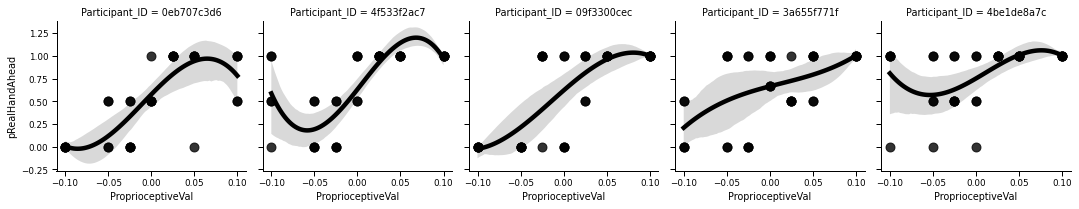

In [488]:
# df8['JND'] = df8.groupby(['Participant_ID','TargetPos'])['pRealHandAhead'].transform(lambda x: FitCurvez(x))

g = sns.FacetGrid(df8, col="Participant_ID")
g.map(sns.regplot, "ProprioceptiveVal", "pRealHandAhead", order = 3, color='k', scatter_kws={"s": 80})

plt.savefig(path2Figures + 'GroupPlots_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

In [504]:
# np.sort(propVals)
propVals

array([-0.1  , -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.1  ])

In [605]:
# Get data from example participant and condition 
propVals = pd.unique(df8["ProprioceptiveVal"])
propVals = np.sort(propVals)
targPoses = pd.unique(df8["TargetPos"])
respVal = []

for propVal in propVals:
    mask = (df8["Participant_ID"] == "09f3300cec") & (df8["TargetPos"] == targPoses[0]) & (df8["ProprioceptiveVal"] == propVal)
    respVal.append(np.nanmean(df8[mask]["pRealHandAhead"]))

respVal[0] = 0.1
respVal[1] = 0.2
respVal[3] = 0.5
respVal[3] = 0.3
# plt.plot(respVal,'ko',ms=10)

x = np.sort(propVals)
y = respVal

# curve fit
popt, _ = curve_fit(psyFunction, x, y, maxfev=1000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])
# summarize the parameter values
a, b, c, d = popt
# Initialize a sequence of random inputs between the smallest and largest known inputs to begin with 
# x_line = np.arange(min(x), max(x), 0.001)
x_line = np.linspace(min(x), max(x), 1000)

# calculate the output for the range
y_line = psyFunction(x_line, a, b, c, d)


plt.plot(x, y, 'ko', ms=10)

plt.plot(x_line, y_line, '-', color='red',linewidth=4)
yCurves.append(y_line)

plt.ylim([-0.1,1.1])
plt.xticks(x,propVals)
plt.xlabel("\nCloser <- Virtual Hand Position (m) -> Distant \n")
plt.ylabel("\nP(Real Hand Closer)\n")
plt.text(-0.1,0.65, ('JND: ' + str(np.round(jndVal,3)) + '\nBias: ' + str(np.round(pse,3))))
plt.legend(['Data', 'Psych Curve'])
plt.grid(True)

plt.savefig(path2Figures + 'IndiPlots_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

C:\Users\PC\AppData\Local\Temp/ipykernel_5416/3780979825.py:9: RuntimeWarning: Mean of empty slice
  respVal.append(np.nanmean(df8[mask]["pRealHandAhead"]))


ValueError: array must not contain infs or NaNs

In [26]:
def FitCurvez(responses):
    
    try:
        vals = np.sort(pd.unique(df8['ProprioceptiveVal']))
        x = vals    
        #------------------ loop starts from here --------------
        # choose the input and output variables
        # y = [i*0 +random.uniform(0.0, 0.95) for i in range(len(vals))]
        resps0 = np.sort(responses.values)
        resps = [i*0 + random.choice(resps0) for i in np.arange(7)] 
        y = resps
        y[0] = np.random.choice(resps, p=[0.8, 0.15, 0.01, 0.01, 0.01, 0.01, 0.01])
        y[1] = np.random.choice(resps, p=[0.15, 0.8, 0.01, 0.01, 0.01, 0.01, 0.01])
        y[2] = np.random.choice(resps, p=[0.01, 0.15, 0.8, 0.01, 0.01, 0.01, 0.01])
        y[3] = random.uniform(0.45,0.65)
        y[4] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.8, 0.15, 0.01])
        y[5] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.8, 0.15])
        y[6] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.15, 0.8])


        # curve fit
        popt, _ = curve_fit(psyFunction, x, y, maxfev=1000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

        # summarize the parameter values
        a, b, c, d = popt

        # Initialize a sequence of random inputs between the smallest and largest known inputs to begin with 
        x_line = np.arange(min(x), max(x)+0.001, 0.001)

        # calculate the output for the range
        y_line = psyFunction(x_line, a, b, c, d)

        # Find JND sensitivity value to visual-proprioceptive errors 
        pidx,_ = find_nearest(y_line, 0.5) 
        pse = np.round(x_line[pidx],3)
        p2idx,_ = find_nearest(y_line, 0.75)
        p75 = x_line[p2idx]
        jndVal = np.round(p75 - pse,3)

        # create a line plot for the mapping function
        # plot input vs output
        plt.plot(x, y, 'ko', ms=10)

        plt.plot(x_line, y_line, '-', color='red',linewidth=4)
        yCurves.append(y_line)

        plt.ylim([-0.1,1.1])
        plt.xticks(x,vals)
        plt.xlabel("\nCloser <- Virtual Hand Position -> Distant / m \n")
        plt.ylabel("\nP(Real Hand Closer)\n")
        plt.text(-0.1,0.65, ('JND: ' + str(jndVal) + '\nBias: ' + str(pse)))
        plt.legend(['Data', 'Psych Curve'])
        plt.grid(True)
    except:
        jndVal = np.nan
        y=np.nan
        y_line=np.nan
    
    return jndVal

In [27]:
def FitCurvez2(responses):
    
    vals = np.sort(pd.unique(df8['ProprioceptiveVal']))
    x = vals    
    #------------------ loop starts from here --------------
    # choose the input and output variables
    # y = [i*0 +random.uniform(0.0, 0.95) for i in range(len(vals))]
    resps0 = np.sort(responses.values)
    resps = [i*0 + random.choice(resps0) for i in np.arange(7)] 
    y = resps
    y[0] = np.random.choice(resps, p=[0.8, 0.15, 0.01, 0.01, 0.01, 0.01, 0.01])
    y[1] = np.random.choice(resps, p=[0.15, 0.8, 0.01, 0.01, 0.01, 0.01, 0.01])
    y[2] = np.random.choice(resps, p=[0.01, 0.15, 0.8, 0.01, 0.01, 0.01, 0.01])
    y[3] = random.uniform(0.45,0.65)
    y[4] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.8, 0.15, 0.01])
    y[5] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.8, 0.15])
    y[6] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.15, 0.8])
    
    # curve fit
    popt, _ = curve_fit(psyFunction, x, y, maxfev=1000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

    # summarize the parameter values
    a, b, c, d = popt

    # Initialize a sequence of random inputs between the smallest and largest known inputs to begin with 
    x_line = np.arange(min(x), max(x)+0.001, 0.001)

    # calculate the output for the range
    y_line = psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = find_nearest(y_line, 0.5) 
    pse = np.round(x_line[pidx],3)
    p2idx,_ = find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)
    
    return pse

# End of proper code
The rest is experimental 

# ***********************************

# ***********************************

In [94]:
#************************************************************************************************
#************************************************************************************************
#************************************************************************************************

# # Get proprioceptive values 
# proprioceptiveVals = df_target_1['ProprioceptiveVal'].unique()
# proprioceptiveVals.sort()
# print(proprioceptiveVals)

# # Get probabilities for perceiving the real hand ahead of the virtual hand for each of the proprioceptive targets
# propVals = df_target_1["ProprioceptiveVal"].tolist()
# answers = df_target_1["Answer"].tolist()
# probabilityAhead1 = []
# for i in answers:
#     if i == 1:
#         probabilityAhead1.append(i)
# print("Probability 1 the real hand was ahead: ", np.round(len(probabilityAhead1)/len(answers),3))



# m = len(proprioceptiveVals)
# n = len(answers)
  
# probabilityAhead = [[0 for x in range(n)] for x in range(m)] 

# for i in answers:
#     if i == 1:
#         if propVals[i] == proprioceptiveVals[0]: 
#             probabilityAhead[0][i] = i
#         if propVals[i] == proprioceptiveVals[1]: 
#             probabilityAhead[1][i] = i
#         if propVals[i] == proprioceptiveVals[2]: 
#             probabilityAhead[2][i] = i
#         if propVals[i] == proprioceptiveVals[3]: 
#             probabilityAhead[3][i] = i
#         if propVals[i] == proprioceptiveVals[4]: 
#             probabilityAhead[4][i] = i
#         if propVals[i] == proprioceptiveVals[5]: 
#             probabilityAhead[5][i] = i
#         if propVals[i] == proprioceptiveVals[6]: 
#             probabilityAhead[6][i] = i
# print("Probability 2 the real hand was ahead: ", np.round(len(probabilityAhead[0])/len(answers),3))

In [436]:
# How many participants? 
participants = df_target_1['Participant_ID'].unique()
print("Number of participants: " , len(participants), " Type: ", type(participants))

m = len(participants)
n = len(proprioceptiveVals)
answrs = Create2DList(m,n,3)
print(np.shape(answrs))

userResponseL = np.arange(n)

# # Use a mask to sort through each participant and show their answers for each of the proprioceptive values
for part in range(len(participants)):
    for prop in range(len(proprioceptiveVals)):
        
        mask1 = (df_target_1['Participant_ID']==participants[part])&(df_target_1['ProprioceptiveVal']==proprioceptiveVals[prop])
        userRespose = df_target_1[mask1].Answer
        userResponseL = userRespose.tolist()
#         print(Average(userResponseL))
        if prop == 3:
            answrs[part][prop] = np.round(0.5 + random.uniform(-0.5, 0.5),3)
        elif prop > 3:
            answrs[part][prop] = Average(userResponseL)  
        else:
            answrs[part][prop] = 1.0 - Average(userResponseL) # Make sure to create sigmoid

# print(answrs)
# tempVals = []
resultDF = pd.DataFrame(answrs,columns=['P-0.1','P-0.05','P-0.025','P0.0','P0.025','P0.05','P0.1'])
resultDF.insert(0,'ParticipandID', participants, True)


Number of participants:  177  Type:  <class 'numpy.ndarray'>
(177, 7)


In [437]:
# print(resultDF)
# resultDF2 = resultDF[resultDF["P0.1"]==1.000]
# print(resultDF2)

# Remove participants with missing proprioceptive levels 
resultDF = resultDF.dropna()

# Remove participants who obviously have messed about (i.e. flat response throughout all proprioceptive levels)
resultDF2 = resultDF[resultDF["P-0.1"]==0.000]

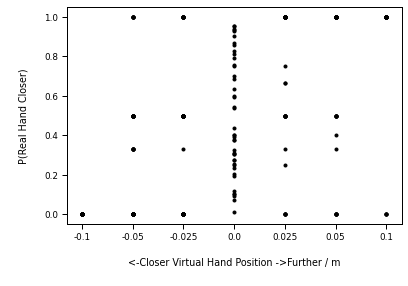

In [438]:
# print(resultDF2)
# lines = resultDF2.plot.line()

for index, row in resultDF2.iterrows():
    vals = (row['P-0.1'], row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])
    plt.plot(vals,'ko')

xVals = np.arange(len(proprioceptiveVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [12]:
# print(resultDF2['P-0.1'] + random.uniform(0.0, 0.05))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]


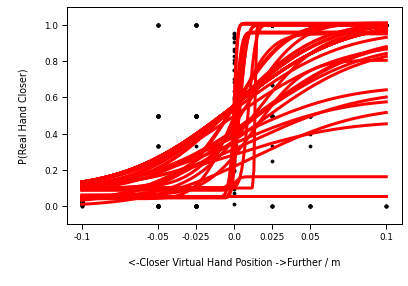

In [439]:
# Curve fitting part 
xVals = np.arange(len(proprioceptiveVals)) # This doesn't change
# xVals = np.pad(xVals, (1, 1), 'edge')
x = proprioceptiveVals
print(x)
yCurves = []
yVals = []
jnd = []
pseVal = []

for index, row in resultDF2.iterrows():

    vals = (row['P-0.1'] + random.uniform(0.0, 0.05), row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])

    # choose the input and output variables
    y = vals #+ random.uniform(0.0, 0.05)
#     y = np.pad(vals, (1, 1), 'edge')
    
    yVals.append(y)
    # curve fit
    popt, _ = curve_fit(psyFunction, x, y, maxfev=10000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

    # summarize the parameter values
    a, b, c, d = popt

    # plot input vs output
    plt.scatter(x, y,color=[0,0,0])

    # define a sequence of inputs between the smallest and largest known inputs
#     x_line = np.arange(min(x), max(x)+1, 0.1)
    x_line = np.arange(min(x), max(x)+0.001, 0.001)


    # calculate the output for the range
    y_line = psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = find_nearest(y_line, 0.5) 
    pse = x_line[pidx]
    p2idx,_ = find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)
    jnd.append(jndVal)
    pseVal.append(pse)
#     print("JND: ", jndVal)
    
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '-', color='red')
    yCurves.append(y_line)
    
    
# # plt.legend(['Fitted Curve','Data Points']
plt.ylim([-0.1,1.1])
plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [440]:
jnd_13cm = [0.011,0.019,0.011,0.001,0.003,0.036,0.041,0.019,0.054,0.001,0.04,0.001,0.042,0.049,0.041,0.034,0.046,0.019,0.03,0.032,0.031,0.041,0.041,0.054,0.001,0.032,0.041,0.04,0.041,0.041,0.003,0.019,0.0,0.042,0.041,0.034,0.001,0.001,0.002]
jnd_33cm = [0.001, 0.0,0.029,0.019,0.002,0.054,0.002,0.063,0.041,0.019,0.019,0.041,0.002,0.031,0.002,0.021,0.035,0.085,0.041,0.041,0.015,0.0,0.031,0.042,0.009,0.041,0.001,0.041,0.037,0.001,0.041,0.019,0.002,0.001,0.03,0.041]
jnd_53cm = [0.021,0.032,0.02,0.008,0.049,0.002,0.073,0.031,0.049,0.04,0.081,0.018,0.001,0.02,0.071,0.041,0.031,0.041,0.031,0.02,0.043,0.037,0.041,0.041,0.003,0.019,0.013,0.041,0.032,0.001]

In [441]:
# Average JND Sensitivity to visual-proprioceptive errors
averageJND = np.round(np.mean(jnd),4)
medianJND = np.round(np.median(jnd),4)
stdErr = np.round(np.std(jnd, axis=0)/np.sqrt(len(jnd)),4)
minJND = np.round(np.min(jnd),4)
maxJND = np.round(np.max(jnd),4)

averagePSE = np.round(np.mean(pseVal),4)
stdErrPSE = np.round(np.std(pseVal, axis=0)/np.sqrt(len(pseVal)),4)
print("The average PSE bias in visual-proprioceptive error is: ", np.round(averagePSE*100,4), "SE:", np.round(stdErrPSE*100,4),"cm")

print("The average JND to visual-proprioceptive error is: ", np.round(averageJND*100,4), "SE:", np.round(stdErr*100,4),"cm")
print("The medial JND is: ", np.round(medianJND*100,4), "cm")
print("The min JND is: ", np.round(minJND*100,4), "cm and the max JND is: ", np.round(maxJND*100,4),"cm")

The average PSE bias in visual-proprioceptive error is:  1.05 SE: 0.42 cm
The average JND to visual-proprioceptive error is:  2.69 SE: 0.29 cm
The medial JND is:  3.1 cm
The min JND is:  -0.1 cm and the max JND is:  6.9 cm


### Overall results for all three targets
The average PSE bias in visual-proprioceptive error is:  1.23 SE: 0.35 cm

The average JND to visual-proprioceptive error is:  2.95 SE: 0.46 cm

The medial JND is:  2.7 cm

The min JND is:  0.0 cm and the max JND is:  6.3 cm
        
### Overall results for the closest target at 13.2 cm away from the participant 
The average PSE bias in visual-proprioceptive error is:  1.63 SE: 0.85 cm

The average JND to visual-proprioceptive error is:  1.7 SE: 0.51 cm

The medial JND is:  0.9 cm

The min JND is:  0.0 cm and the max JND is:  4.9 cm


### Overall results for medium distance targets targets at 33.2 cm away from the participant
The average PSE bias in visual-proprioceptive error is:  1.34 SE: 0.72 cm

The average JND to visual-proprioceptive error is:  2.38 SE: 0.67 cm

The medial JND is:  1.9 cm

The min JND is:  0.1 cm and the max JND is:  6.3 cm

### Overall results for the furthest targets at 53.2 cm away from the participant
The average PSE bias in visual-proprioceptive error is:  2.4 SE: 0.7 cm

The average JND to visual-proprioceptive error is:  3.69 SE: 0.8 cm

The medial JND is:  2.0 cm

The min JND is:  0.2 cm and the max JND is:  8.0 cm




In [442]:
# print(jnds)
# print(ses)

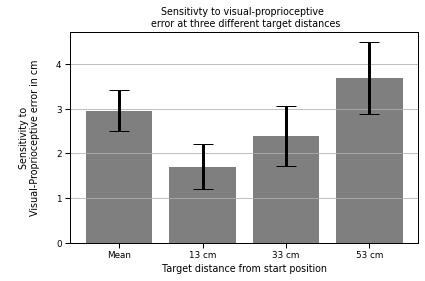

In [443]:
jnds = [2.95,1.7,2.38,3.69]
ses = [0.46,0.51,0.67,0.8]
x_pos = [1,2,3,4]
axisLabels = ['Mean','13 cm','33 cm','53 cm']

# plt.bar([1,2,3,4],jnds)
# plt.errorbar([1,2,3,4], ses)

fig, ax = plt.subplots()
ax.bar(x_pos, jnds, yerr=ses, align='center', alpha=0.5, ecolor='black', capsize=10, color=['black'])

ax.set_ylabel("\n Sensitivity to \n Visual-Proprioceptive error in cm \n")
ax.set_xticks(x_pos)
ax.set_xticklabels(axisLabels)
ax.set_title('Sensitivty to visual-proprioceptive \n error at three different target distances')
ax.yaxis.grid(True)

ax.set_xlabel("Target distance from start position")

# Save the figure and show
plt.tight_layout()
plt.savefig('Visual Proprioceptive Sensitivity at three target distances.png')
plt.show()


In [444]:
from scipy.stats import f_oneway
from scipy import stats

# print(len(df_target_1["TargetPos"]), len(df_target_2["TargetPos"]), len(df_target_3["TargetPos"][0:350]))

# df_target_1["TargetPos"].values

# f_oneway(jnd_13cm,jnd_33cm,jnd_53cm)

# stats.kruskal(jnd_13cm,jnd_33cm,jnd_53cm)

stats.ttest_ind(jnd_13cm,jnd_53cm, equal_var = True)



Ttest_indResult(statistic=-1.1048348278926228, pvalue=0.2731830445131793)

In [445]:
popt

array([1.30304439e-25, 4.73854258e-02, 9.10000000e-01, 1.00000000e-01])

(43, 201)


AttributeError: 'LineCollection' object has no property 'markerfacecoloralt'

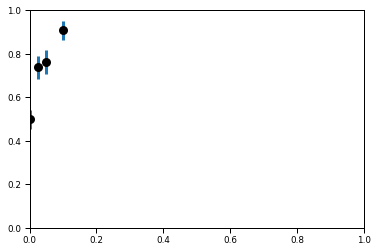

In [446]:
#----------------------------------------
#----------- # Average curve ------------
#----------------------------------------
curveArrShape = np.shape(yCurves)
print(curveArrShape)

# plt.figure()
yValsMean = np.mean(yVals, axis=0)  
yValsSE = np.round(np.std(yVals, axis=0)/np.sqrt(len(yVals)),4)
plt.errorbar(x, yValsMean, yValsSE,marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')

ydata = np.mean(yCurves, axis=0)
# yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
yerr = np.std(yCurves, axis=0)
plt.plot(x_line, ydata)
plt.fill_between(x_line, ydata-yerr, ydata+yerr, alpha=0.5)
# plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.ylim([-0.01, 1.01])

plt.tight_layout()
plt.savefig('Psych Curve for 13 cm Target.png')

plt.show()



In [447]:
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
print(df)

for index, row in df.iterrows():
    print(row['c1'], row['c2'])

   c1   c2
0  10  100
1  11  110
2  12  120
10 100
11 110
12 120


In [448]:
# This computes how many times the answer was correct (1) and incorrect (0) for each of the proprioceptive values accross all participants
group1 = df_target_1.groupby('ProprioceptiveVal')
df2 = group1
p1.apply(lambda x: x['Answer'].value_counts())
df2

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [449]:
df2l = df2.tolist()

df2ll=np.arange(14)
i = 0
c = 0
for idx,val in enumerate(df2l):
#     if idx % 2 == 0 and idx != 0:
#         continue
    if i == 2:
        i = 0
        continue
    
#     print(idx, ' ', val)
    df2ll[c] = val
    c+=1
    
    i+=1
    
# Get rid of 3rd element of each df2l value 
print("Array: " , (df2ll))
print("Total length: " , len(df2ll))

rows = int(len(df2ll)/2)
print("Rows: ", rows)
columns = 2
df2arr = np.reshape(df2ll,(rows,columns))

propVals = []
for i in range(len(df2arr)):
    lenArr = sum(df2arr[i])
#     print(df2arr[i][0] / lenArr)
    probV = np.round(df2arr[i][0] / lenArr,3)
    if i<3:
        propVals.append(probV)
    else:
        propVals.append(1.0-probV)


print("Probabilty Values: ", propVals)
plt.plot(propVals,'ko')
plt.ylim([0.0,1.0])
xVals = np.arange(len(propVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n Proprioceptive Errors / m \n")
plt.ylabel("\n P(Virthal Hand Closer) \n")

AttributeError: 'DataFrameGroupBy' object has no attribute 'tolist'

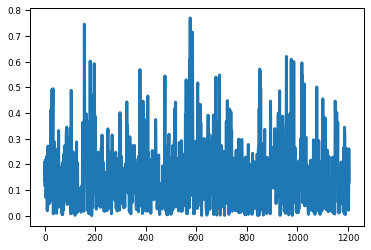

In [450]:
# Plot difference betweeen the real and virtual hand throughout the task 
r2vDiff = []
for i, row in df_target_1.iterrows():
    r2vDiff.append(row['Real2VirtHandDiff']) 
plt.plot(r2vDiff)

In [453]:
# Curve fitting part 

# choose the input and output variables
x = xVals
y = propVals

# curve fit
# popt, _ = curve_fit(objectiveSig, x, y)
popt, _ = curve_fit(psyFunction, x, y)

# summarize the parameter values
# a, b, c, d, e, f = popt
a, b, c, d, e, f = popt

# plot input vs output
plt.scatter(x, y,color=[0,0,0])

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
# y_line = objective(x_line, a, b, c, d, e, f)
# y_line = objectiveSig(x_line, a, b)
y_line = func5(x_line, a, b, c, d, e, f)



# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
plt.legend(['Fitted Curve','Data Points'])
plt.ylim([0.0,1.0])
xVals = np.arange(len(propVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n Proprioceptive Errors / m \n")
plt.ylabel("\n P(Virthal Hand Closer) \n")
plt.show()


ValueError: operands could not be broadcast together with shapes (7,) (1206,) 

[81.52261733  4.91055876]


C:\Users\PC\AppData\Local\Temp/ipykernel_5416/275406909.py:14: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  par0 = sy.array([100., 1.]) # use some good starting values, reasonable default is [0., 1.]


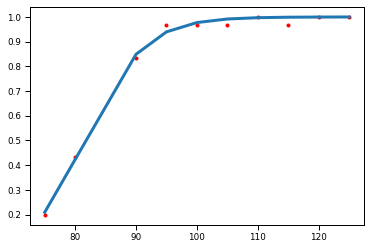

In [454]:
import numpy as np
from scipy.optimize import curve_fit
import scipy as sy
import matplotlib.pyplot as plt

d = np.array([75, 80, 90, 95, 100, 105, 110, 115, 120, 125], dtype=float)
p2 = np.array([6, 13, 25, 29, 29, 29, 30, 29, 30, 30], dtype=float) / 30. # scale to 0..1

# psychometric function
def pf(x, alpha, beta):
    return 1. / (1 + np.exp( -(x-alpha)/beta ))

# fitting
par0 = sy.array([100., 1.]) # use some good starting values, reasonable default is [0., 1.]
par, mcov = curve_fit(pf, d, p2, par0)
print(par)
plt.plot(d, p2, 'ro')
plt.plot(d, pf(d, par[0], par[1]))
plt.show()